# Square-root transformation


Suitable for count variables (column)

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [29]:
# create dataframe
df = pd.DataFrame()

# draw samples from a poisson distribution
df["counts1"] = stats.poisson.rvs(mu=3, size=10000)
df["counts2"] = stats.poisson.rvs(mu=2, size=10000)

# display top rows
df.head()

,counts1,counts2
0,2,4
1,2,1
2,5,2
3,3,0
4,0,3


In [30]:
def diagnostic_plots(df, variable):

    # function to plot a bar plot and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15, 6))

    # histogram
    plt.subplot(1, 2, 1)
    df[variable].value_counts().sort_index().plot.bar()
    plt.title(f"Bar plot of {variable}")

    # q-q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

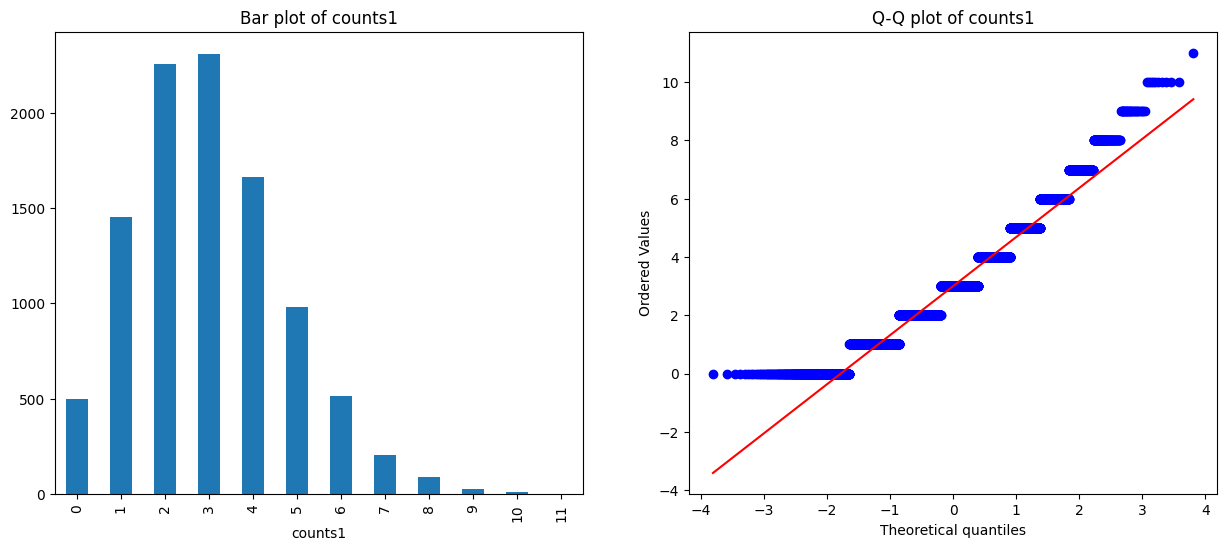

In [31]:
diagnostic_plots(df, "counts1")

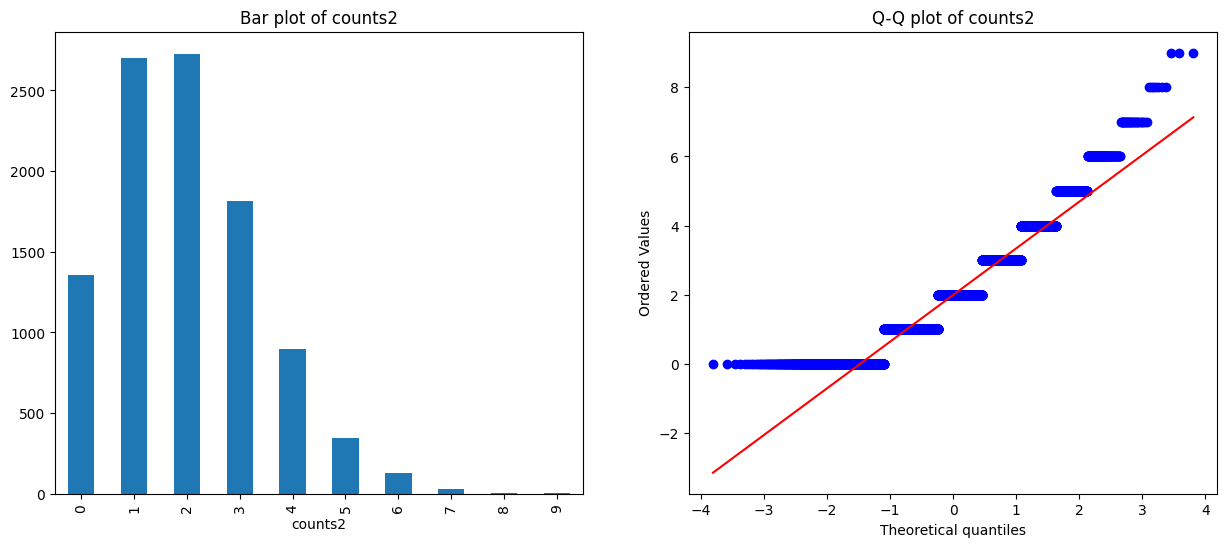

In [32]:
diagnostic_plots(df, "counts2")

# Square root with NumPy

In [33]:
# make a copy of the dataframe

df_tf = df.copy()

In [34]:
# apply square root transformation

df_tf[["counts1", "counts2"]] = np.sqrt(df[["counts1", "counts2"]])

df_tf[["counts1", "counts2"]] = np.round(df_tf[["counts1", "counts2"]], 2)

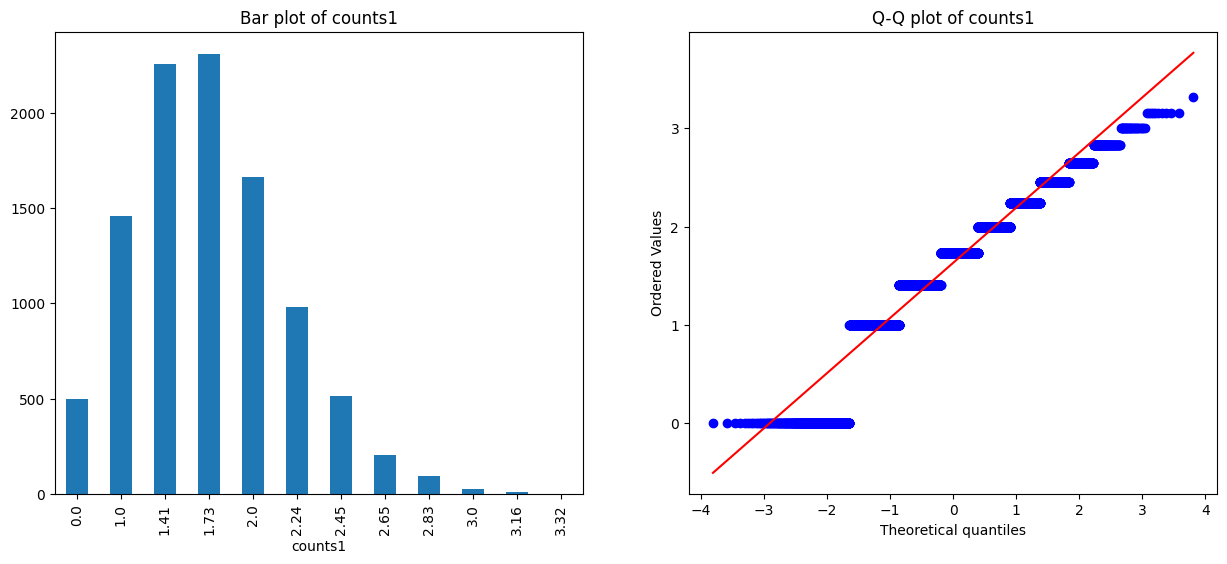

In [35]:
diagnostic_plots(df_tf, "counts1")

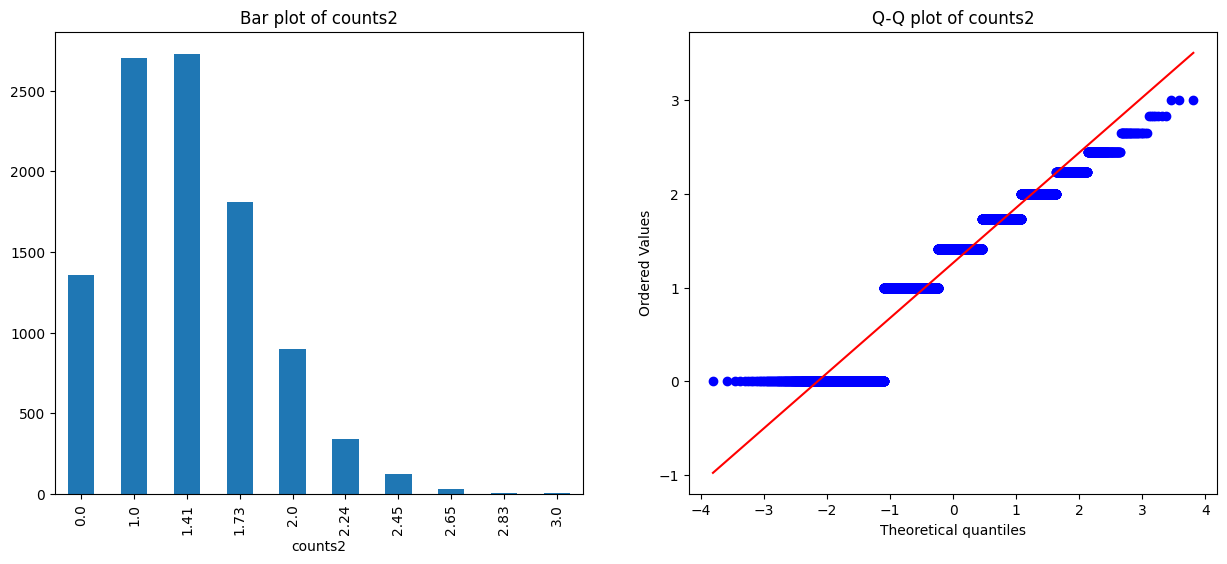

In [36]:
diagnostic_plots(df_tf, "counts2")

# The histogram shape does not change that much but Q-Q plot has more blue dots following the red line now